In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import pytz
import math
import scipy.stats as st

In [2]:
#open loan csv file
df = pd.read_csv('loan.csv',low_memory=False)
#show all columns
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
#describe dataframe
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
# check duplicate rows
duplicate = df[df.duplicated()]
duplicate.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


many column seem to be empty

In [5]:
#check null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
df.isnull().all(axis=0)

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

this is not giving a correct picture, use custom method to check values

In [7]:
# check column value counts
def check_value_counts():
    print('{0: <40}'.format("Column name:"),"Values Count:")
    print()
    for i in df.columns:
        x = df[i].value_counts()
        print('{0: <40}'.format(i),len(x))
        print()

In [8]:
check_value_counts()

Column name:                             Values Count:

id                                       39717

member_id                                39717

loan_amnt                                885

funded_amnt                              1041

funded_amnt_inv                          8205

term                                     2

int_rate                                 371

installment                              15383

grade                                    7

sub_grade                                35

emp_title                                28820

emp_length                               11

home_ownership                           5

annual_inc                               5318

verification_status                      3

issue_d                                  55

loan_status                              3

pymnt_plan                               1

url                                      39717

desc                                     26527

purpose                 

value counts = 0 means there are no values in that column

In [9]:
# check and drop empty columns
for i in df.columns:
    x = df[i].value_counts()
    if len(x) == 0:
        print("Dropping empty column",i)
        df.drop(columns=[i],inplace=True)
        print()

Dropping empty column mths_since_last_major_derog

Dropping empty column annual_inc_joint

Dropping empty column dti_joint

Dropping empty column verification_status_joint

Dropping empty column tot_coll_amt

Dropping empty column tot_cur_bal

Dropping empty column open_acc_6m

Dropping empty column open_il_6m

Dropping empty column open_il_12m

Dropping empty column open_il_24m

Dropping empty column mths_since_rcnt_il

Dropping empty column total_bal_il

Dropping empty column il_util

Dropping empty column open_rv_12m

Dropping empty column open_rv_24m

Dropping empty column max_bal_bc

Dropping empty column all_util

Dropping empty column total_rev_hi_lim

Dropping empty column inq_fi

Dropping empty column total_cu_tl

Dropping empty column inq_last_12m

Dropping empty column acc_open_past_24mths

Dropping empty column avg_cur_bal

Dropping empty column bc_open_to_buy

Dropping empty column bc_util

Dropping empty column mo_sin_old_il_acct

Dropping empty column mo_sin_old_rev_tl_o

In [10]:
check_value_counts()

Column name:                             Values Count:

id                                       39717

member_id                                39717

loan_amnt                                885

funded_amnt                              1041

funded_amnt_inv                          8205

term                                     2

int_rate                                 371

installment                              15383

grade                                    7

sub_grade                                35

emp_title                                28820

emp_length                               11

home_ownership                           5

annual_inc                               5318

verification_status                      3

issue_d                                  55

loan_status                              3

pymnt_plan                               1

url                                      39717

desc                                     26527

purpose                 

value counts = 1 means there is at the most 1 value in that column

there are several single valued columns

In [11]:
# check columns values with single value
for i in df.columns:
    x = df[i].value_counts()
    if len(x) == 1:
        print(x)
        print()
        print()

n    39717
Name: pymnt_plan, dtype: int64


f    39717
Name: initial_list_status, dtype: int64


0.0    39661
Name: collections_12_mths_ex_med, dtype: int64


1    39717
Name: policy_code, dtype: int64


INDIVIDUAL    39717
Name: application_type, dtype: int64


0    39717
Name: acc_now_delinq, dtype: int64


0.0    39661
Name: chargeoff_within_12_mths, dtype: int64


0    39717
Name: delinq_amnt, dtype: int64


0.0    39678
Name: tax_liens, dtype: int64




these single valued columns are useless

In [12]:
# drop columns with single value
for i in df.columns:
    x = df[i].value_counts()
    if len(x) == 1:
        print("Dropping single value column",i)
        df.drop(columns=[i],inplace=True)
        print()

Dropping single value column pymnt_plan

Dropping single value column initial_list_status

Dropping single value column collections_12_mths_ex_med

Dropping single value column policy_code

Dropping single value column application_type

Dropping single value column acc_now_delinq

Dropping single value column chargeoff_within_12_mths

Dropping single value column delinq_amnt

Dropping single value column tax_liens



In [13]:
check_value_counts()

Column name:                             Values Count:

id                                       39717

member_id                                39717

loan_amnt                                885

funded_amnt                              1041

funded_amnt_inv                          8205

term                                     2

int_rate                                 371

installment                              15383

grade                                    7

sub_grade                                35

emp_title                                28820

emp_length                               11

home_ownership                           5

annual_inc                               5318

verification_status                      3

issue_d                                  55

loan_status                              3

url                                      39717

desc                                     26527

purpose                                  14

title                  

In [14]:
#check null values
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

check some column values where nulls are more

In [15]:
#check column next_pymnt_d
df.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [16]:
#check column next_pymnt_d
dnext_pymnt = df[-df.next_pymnt_d.isnull()]
dnext_pymnt.head(30)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.0,0.0,May-16,67.79,Jun-16,May-16,0.0
32,1065420,1299514,10000,10000,9975.00000,60 months,15.96%,242.97,C,C5,US Legal Support,2 years,RENT,29120.0,Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Brown Eyes Loan,330xx,FL,22.83,0,Feb-97,1,68.0,NaN,11,0,16158,63.60%,31,1849.10,1844.43,12594.24,12562.85,8150.89,4443.35,0.00,0.0,0.0,May-16,242.97,Jun-16,Apr-16,0.0
39,1069346,1304237,12500,12500,12475.00000,60 months,12.69%,282.44,B,B5,United States Infrastructure Corporation,1 year,RENT,27000.0,Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/20/11 > The purpose of ...,debt_consolidation,Credit card debt,604xx,IL,16.04,0,Dec-01,3,NaN,NaN,6,0,10143,50%,24,2181.42,2177.03,14636.30,14607.08,10318.58,4317.72,0.00,0.0,0.0,May-16,282.44,Jun-16,May-16,0.0
86,1063958,1297940,14000,14000,13975.00000,60 months,17.27%,349.98,D,D3,community colleges of spokane,4 years,RENT,28000.0,Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > most of my teet...,other,dental care,992xx,WA,6.34,0,Jul-05,2,NaN,NaN,5,0,6986,79.40%,10,2637.34,2632.59,18176.96,18144.59,11362.67,6814.29,0.00,0.0,0.0,May-16,349.98,Jun-16,May-16,0.0
95,1068575,1303001,15300,15300,15275.00000,60 months,22.06%,423.10,F,F4,OSSI,6 years,RENT,85000.0,Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Consolidation,226xx,VA,20.58,0,Feb-84,2,56.0,NaN,14,0,26524,89.70%,27,3125.79,3120.68,21988.20,21952.28,12174.21,9813.99,0.00,0.0,0.0,May-16,423.10,Jun-16,May-16,0.0
99,1067874,1302235,6000,6000,6000.00000,60 months,12.69%,135.57,B,B5,Anadarko Petroleum Corporation,< 1 year,RENT,81000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > The following i...,major_purchase,Major Purchase Loan,802xx,CO,13.66,1,Nov-04,0,20.0,NaN,6,0,15102,50%,17,1041.99,1041.99,7037.39,7037.39,4958.01,2079.38,0.00,0.0,0.0,May-16,135.57,Jun-16,May-16,0.0
101,1034693,1264291,16000,16000,16000.00000,60 months,17.58%,402.65,D,D4,Menards,7 years,RENT,65000.0,Not Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > We have never b...,debt_consolidation,Debt Consolidation Loan,672xx,KS,15.56,0,Oct-96,0,NaN,NaN,8,0,21166,87.10%,16,3033.28,3033.28,20908.55,20908.55,12966.72,7941.83,0.00,0.0,0.0,May-16,402.65,Jun-16,May-16,0.0
184,1046969,1277832,11000,11000,10750.00000,60 months,13.49%,253.06,C,C1,Department Of Health,10+ years,MORTGAGE,129000.0,Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/13/11 > I will be payin...,debt_consolidation,Breathing Room,927xx,CA,10.94,0,Nov-97,0,80.0,NaN,10,0,1735,24.10%,31,1941.27,1897.50,13131.62,12832.58,9058.73,4072.89,0.00,0.0,0.0,May-16,253.06,Jun-16,May-16,0.0
217,1066664,1300858,21000,11800,11500.00000,60 months,17.27%,294.98,D,D3,New Jersey Institute Of Technology (NJIT,10+ years,MORTGAGE,109000.0,Verified,Dec-11,

**next_pymnt_d column can be dropped as it looks applicable to current loan status and for next payment date for the loan, it will not help in analysis**

In [17]:
df.drop(columns=['next_pymnt_d'],inplace=True)

In [18]:
df.mths_since_last_record.value_counts()

0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
14.0       1
6.0        1
120.0      1
5.0        1
129.0      1
Name: mths_since_last_record, Length: 111, dtype: int64

In [19]:
#check column mths_since_last_delinq
df.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
115.0      1
106.0      1
95.0       1
120.0      1
89.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

**looks like delinquency happened and it is count of months since last delinquency**

In [20]:
#check values for pub_rec_bankruptcies
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [21]:
# check desc column
df.desc.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            210
Debt Consolidation                                                                                                                                                                                                                                                                                      

**looks like a subjective column and we can't use it for analysis**

In [22]:
#drop desc column
df.drop(columns=['desc'],inplace=True)

In [23]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50%,3,0.00,0.00,1476.19000

**let's start fixing and formatting some columns**

columns int_rate & revol_util have % symbol at the end, lets remove % character

In [24]:
df['int_rate'] = df.int_rate.map(lambda x:float(x[:-1]))

In [25]:
#for revol_util replace null with 0%
df[['revol_util']] = df[['revol_util']].fillna(value='0%')

In [26]:
#remove % character
df[['revol_util']] = df.revol_util.map(lambda x:float(x[:-1]))

fix emp_length and convert it into a numeric column

In [27]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [28]:
#function to convert emp_length into int
def fix_emp_length(v):
    x,isna= v
    if isna == True:
        return x
    x = str(x)
    if x == '10+ years':
        return int('10')
    elif x == '< 1 year':
        return int('1')
    else:
        return int(x[0:1])

In [29]:
#mark emp_length which are na
df['emp_length_na'] = pd.isna(df["emp_length"])

In [30]:
# convert emp_length to numeric, leaving na values untouched
df['emp_length'] = df[['emp_length','emp_length_na']].apply(fix_emp_length, axis=1)

In [31]:
#drop column emp_length_na as we have no further use for it
df.drop(columns=['emp_length_na'],inplace=True)

In [32]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.00,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4.0,OWN,40000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,1.0,RENT,15000.00,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-

In [33]:
#check term column values
df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [34]:
# extract int months
df.term.map(lambda x:int(str(x)[:3]))

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [35]:
# extract & save int months
df['term'] = df.term.map(lambda x:int(str(x)[:3]))

In [36]:
# check column funded_amnt_inv 
df.funded_amnt_inv.value_counts()

5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
14997.634240       1
4984.304276        1
14445.276000       1
19122.450950       1
21977.142720       1
Name: funded_amnt_inv, Length: 8205, dtype: int64

In [37]:
#Standardise precision for column funded_amnt_inv
df['funded_amnt_inv'] = df.funded_amnt_inv.map(lambda x:round(x,2))

In [38]:
#check all data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  float64
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

**convert all dates from object to date type**

In [39]:
# convert issue_d from object to date
df['issue_d'] = df.issue_d.map(lambda x:datetime.datetime.strptime(str(x),'%b-%y'))

In [40]:
# convert earliest_cr_line from object to date
df['earliest_cr_line'] = df.earliest_cr_line.map(lambda x:datetime.datetime.strptime(str(x),'%b-%y'))

In [41]:
#mark last_pymnt_d which are na
df['last_pymnt_d_na'] = pd.isna(df["last_pymnt_d"])

In [42]:
#function to convert last_pymnt_d into date
def fix_last_pymnt_d(v):
    x,isna= v
    if isna == True:
        return x
    return datetime.datetime.strptime(str(x),'%b-%y')

In [43]:
# convert last_pymnt_d to date, leaving na values untouched
df['last_pymnt_d'] = df[['last_pymnt_d','last_pymnt_d_na']].apply(fix_last_pymnt_d, axis=1)

In [44]:
#drop column last_pymnt_d_na as we have no further use for it
df.drop(columns=['last_pymnt_d_na'],inplace=True)

In [45]:
# check df['total_pymnt']
df['total_pymnt'].value_counts()

11196.569430    26
0.000000        16
10956.775960    16
11784.232230    16
5478.387981     15
                ..
7464.694480      1
17157.401170     1
5421.812875      1
27934.961640     1
4278.294070      1
Name: total_pymnt, Length: 37850, dtype: int64

In [46]:
#Standardise precision for column total_pymnt
df['total_pymnt'] = df.total_pymnt.map(lambda x:round(x,2))

In [47]:
# check total_rec_late_fee
df.total_rec_late_fee.value_counts()

0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
24.060000        1
23.930000        1
37.323504        1
14.977710        1
14.939744        1
Name: total_rec_late_fee, Length: 1356, dtype: int64

In [48]:
#Standardise precision for column total_rec_late_fee
df['total_rec_late_fee'] = df.total_rec_late_fee.map(lambda x:round(x,2))

In [49]:
# check total_rec_late_fee
df.collection_recovery_fee.value_counts()

0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
9.4300          1
11.4154         1
10.1300         1
6.7500          1
118.1412        1
Name: collection_recovery_fee, Length: 2616, dtype: int64

In [50]:
#Standardise precision for column collection_recovery_fee
df['collection_recovery_fee'] = df.collection_recovery_fee.map(lambda x:round(x,2))

In [51]:
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [52]:
df.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [53]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [54]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [55]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000.00,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10.0,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,21.00,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.00,Source Verified,2011-12-01,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,53.90,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,NaN,NaN,9,0,7963,28.30,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,NaN,NaN,7,0,17726,85.60,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,2007-01-01,2,NaN,NaN,4,0,8221,87.50,4,0.00,0.00,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,NaN,4.0,OWN,40000.00,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,2004-04-01,2,NaN,NaN,11,0,5210,32.60,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,1.0,RENT,15000.00,Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,2004-09-01,0,NaN,NaN,2,0,9279,36.50,3,0.00,0.00,1476.19,1469.34,673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,Mar-13,0.0


In [56]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,38642.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448876,42.418007,12.021177,324.561922,5.092050,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,48.770677,22.088828,51.227887,50.989768,12153.596553,11567.149118,9793.348813,2263.663172,1.363019,95.221624,12.406110,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,3.408338,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,28.367689,11.401709,375.172839,373.824457,9042.040768,8942.672613,7065.522127,2608.111964,7.289993,688.744771,148.671591,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,25.300000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,49.200000,20.000000,0.000000,0.000000,9899.640000,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,72.300000,29.000000,0.000000,0.000000,16534.430000,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


**check all histograms**

<AxesSubplot:>

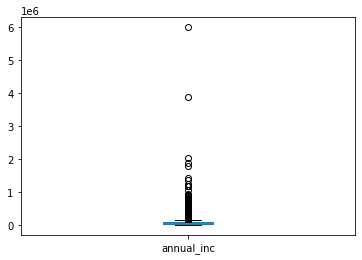

In [57]:
df.annual_inc.plot.box()

In [58]:
df.annual_inc.min()

4000.0

In [59]:
# scale values for annual_inc, divide by 1000
df['annual_inc'] = round(df.annual_inc/1000,2)

<AxesSubplot:>

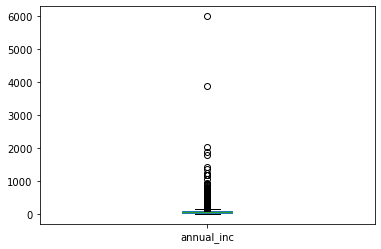

In [60]:
df.annual_inc.plot.box()

In [61]:
# derived columns created below 
#defaulted = 1 if Charged Off loan
#count = 1 for each row
df['defaulted'] = df.loan_status.map(lambda x:1 if x=='Charged Off' else 0)
df['count'] = df.loan_status.map(lambda x:1)

In [62]:
#extract issue_dt year
df['issue_yr'] = df.issue_d.map(lambda x:int(str(x)[:4]))

In [63]:
#Extract dataframes for non default & Default Loans
df_non_default = df[df['loan_status'] != 'Charged Off']
df_default = df[df['loan_status'] == 'Charged Off']

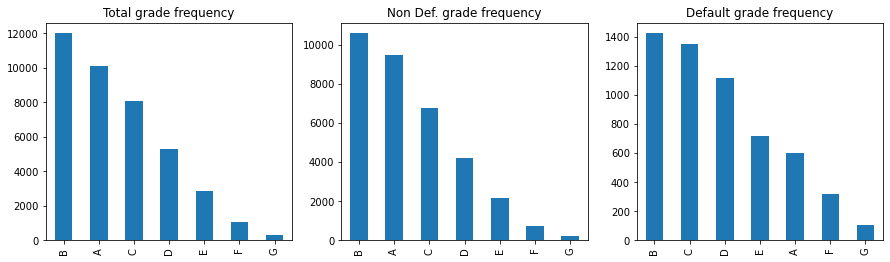

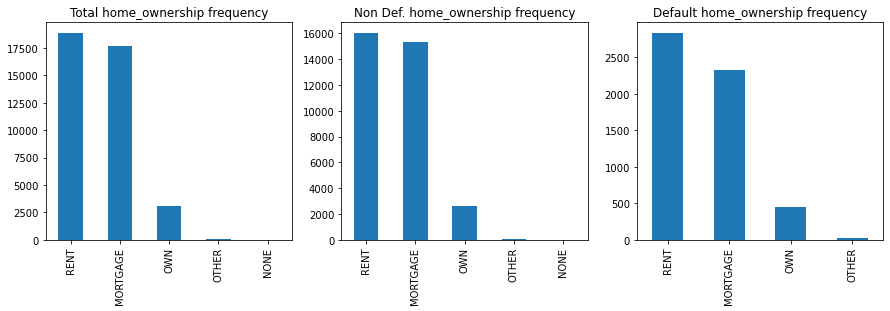

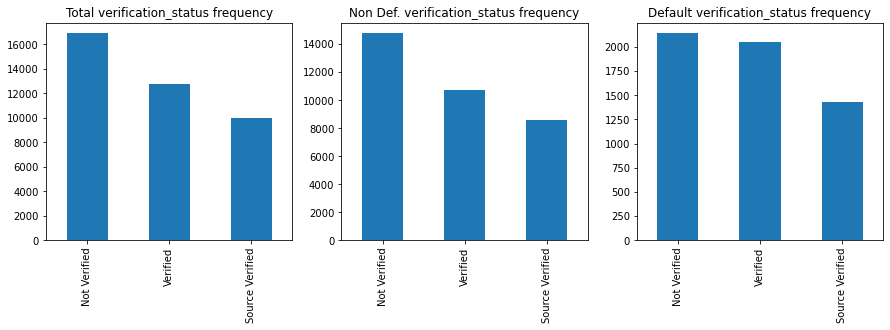

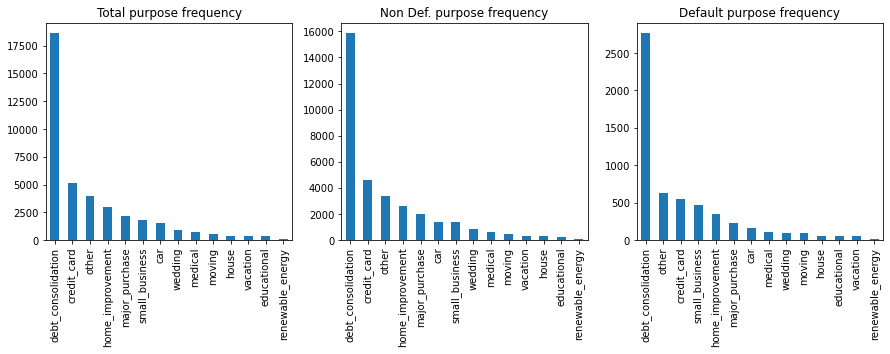

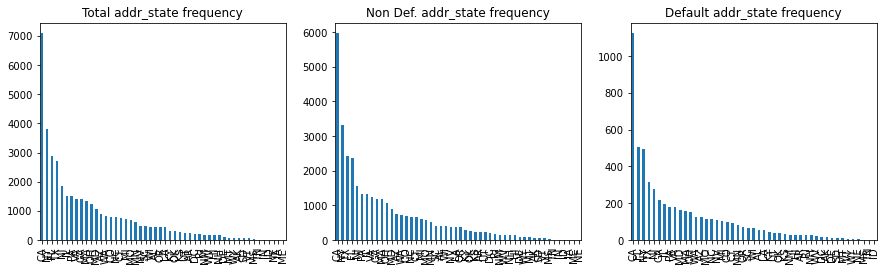

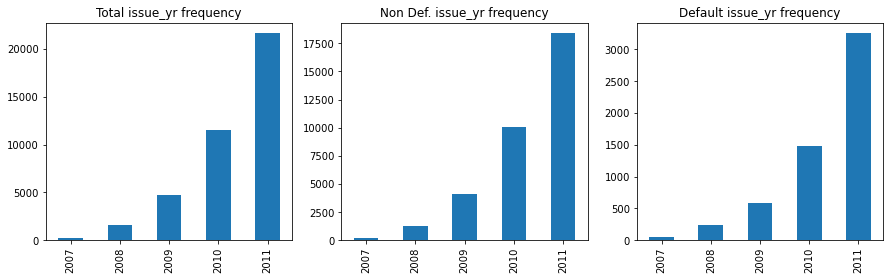

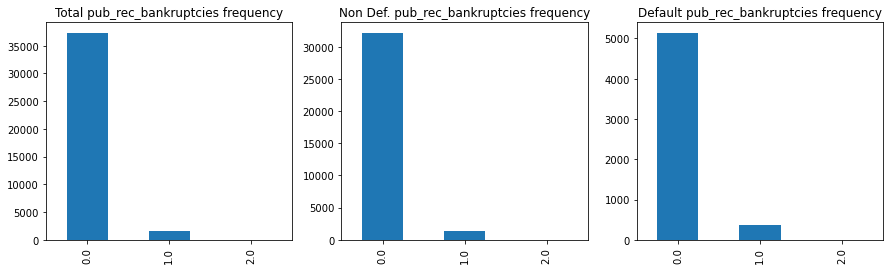

In [64]:
# check all Categorical frequencies
categorical_cols = ['grade','home_ownership','verification_status','purpose','addr_state','issue_yr','pub_rec_bankruptcies']
for col in categorical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    df[col].value_counts().plot(kind='bar',title= "Total " + col + " frequency",ax=axes[0])
    #plt.show()
    df_non_default[col].value_counts().plot(kind='bar',title= "Non Def. "+ col + " frequency",ax=axes[1])
    #plt.show()
    df_default[col].value_counts().plot(kind='bar',title= "Default "+ col + " frequency",ax=axes[2])
    #plt.show()
    #fig.show()

**Observations**
- Home ownership = Rent has highest occurance, Mortgage comes second
- Not Verified loan count is highest, for Defaults Verified & next Source verfied is higher
- Purpose Debt Consolidation frequency is highest
- CA California has highest number of Loans
- In 2011 Company did highest number of loans

In [65]:
# calculated column default_percent created and used for analysis

#function to display categorical columns wise default percentage rankings

def default_table(col):
    grp = df.groupby([col])[['defaulted','count']].sum()
    #grp.reset_index(inplace = True)
    grp['default_percent'] = round((grp['defaulted']/grp['count'])*100,2)
    grp.sort_values(by=['default_percent'], ascending=False, inplace=True)
    print(grp)

In [66]:
#display categorical columns wise default percentage rankings
categorical_cols = ['grade','home_ownership','verification_status','purpose','addr_state','issue_yr','pub_rec_bankruptcies']
for col in categorical_cols:
    default_table(col)

       defaulted  count  default_percent
grade                                   
G            101    316            31.96
F            319   1049            30.41
E            715   2842            25.16
D           1118   5307            21.07
C           1347   8098            16.63
B           1425  12020            11.86
A            602  10085             5.97
                defaulted  count  default_percent
home_ownership                                   
OTHER                  18     98            18.37
RENT                 2839  18899            15.02
OWN                   443   3058            14.49
MORTGAGE             2327  17659            13.18
NONE                    0      3             0.00
                     defaulted  count  default_percent
verification_status                                   
Verified                  2051  12809            16.01
Source Verified           1434   9987            14.36
Not Verified              2142  16921            12.66
      

Findings
=====
1. **Grades =G,F & E have highest default**
2. **home_ownership = OTHER have much higher loan default**
3. **verification_status = Verified has highest and Source Verified has 2nd highest loan default**
4. **Purpose =small_business,renewable_energy & educational Loans have highest default**
5. **States = NE, NV, AK, SD, & FL have the highest defaults**
6. **Not Verified actually have lower default**
7. **2007 was the first year of operations and loans done in that year had higher defaults**
8. **2009,10 had low defaults**
9. **Higher pub_rec_bankruptcies/ Bankruptcy has significantly high default rate**

In [67]:
#function to display categorical columns wise default percentage rankings for subcategories
def default_subtable(col1,col2,rows):
    grp = df.groupby([col1,col2])[['defaulted','count']].sum()
    #grp.reset_index(inplace = True)
    grp['default_percent'] = round((grp['defaulted']/grp['count'])*100,2)
    grp.sort_values(by=['default_percent'], ascending=False, inplace=True)
    disp = grp.head(rows)
    print(disp)

In [68]:
#display categorical columns wise default percentage rankings for subcategories
default_subtable('grade','sub_grade',50)

                 defaulted  count  default_percent
grade sub_grade                                   
F     F5                54    118            45.76
G     G3                19     48            39.58
      G2                28     78            35.90
      G5                10     30            33.33
F     F4                53    168            31.55
G     G1                31    104            29.81
F     F2                70    249            28.11
E     E4               126    454            27.75
F     F1                91    329            27.66
      F3                51    185            27.57
E     E5               109    416            26.20
      E1               198    763            25.95
      E2               163    656            24.85
D     D5               209    874            23.91
G     G4                13     56            23.21
D     D4               215    981            21.92
      D3               256   1173            21.82
E     E3               119    5

Finding confirmed
=====
**Sub Grages within Grades G & F have highest defaults**

In [69]:
#display categorical columns wise default percentage rankings for subcategories
default_subtable('addr_state','zip_code',50)

                     defaulted  count  default_percent
addr_state zip_code                                   
AK         352xx             1      1           100.00
NE         689xx             1      1           100.00
VA         275xx             1      1           100.00
           376xx             1      1           100.00
AZ         727xx             1      1           100.00
TX         385xx             1      1           100.00
           371xx             1      1           100.00
TN         373xx             1      1           100.00
SC         283xx             1      1           100.00
PA         349xx             1      1           100.00
AR         711xx             1      1           100.00
NY         094xx             2      2           100.00
MO         663xx             1      1           100.00
           662xx             1      1           100.00
MA         203xx             1      1           100.00
AK         999xx             1      1           100.00
KS        

In [70]:
#display categorical columns wise default percentage rankings for subcategories with count of loans above a value
col1='addr_state'
col2='zip_code'
rows=50
count_above = 5

grp = df.groupby([col1,col2])[['defaulted','count']].sum()
#grp.reset_index(inplace = True)
grp['default_percent'] = round((grp['defaulted']/grp['count'])*100,2)
grp.sort_values(by=['default_percent'], ascending=False, inplace=True)
grp = grp[grp['count']>=count_above]
disp = grp.head(rows)
print(disp)

                     defaulted  count  default_percent
addr_state zip_code                                   
OK         746xx             5      7            71.43
MN         561xx             5      7            71.43
IL         607xx             7     14            50.00
           608xx             4      8            50.00
AR         719xx             5     11            45.45
CO         808xx             5     11            45.45
OK         744xx             5     11            45.45
MI         496xx             3      7            42.86
NV         897xx             3      7            42.86
KY         425xx             2      5            40.00
SD         573xx             2      5            40.00
MI         499xx             2      5            40.00
OH         438xx             2      5            40.00
KY         416xx             2      5            40.00
MD         215xx             3      8            37.50
WV         253xx             4     11            36.36
IL        

In [71]:
#function to compare histograms for Total, Non Default & Default Loans for any numerical column
def all_hist(col):
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    plot = sns.distplot(df[col], ax=axes[0])
    plot.set_xlabel('Total '+col)
    plot = sns.distplot(df_non_default[col], ax=axes[1])
    plot.set_xlabel('Non Def. '+col)
    plot = sns.distplot(df_default[col], ax=axes[2])
    plot.set_xlabel('Default '+col)

/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


This column can not be represented as a histogram last_credit_pull_d


/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/amansingh/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


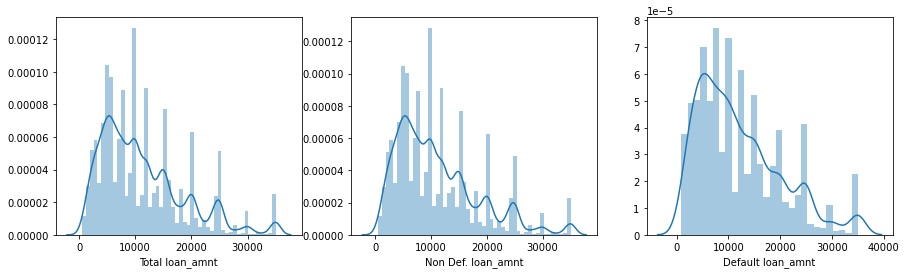

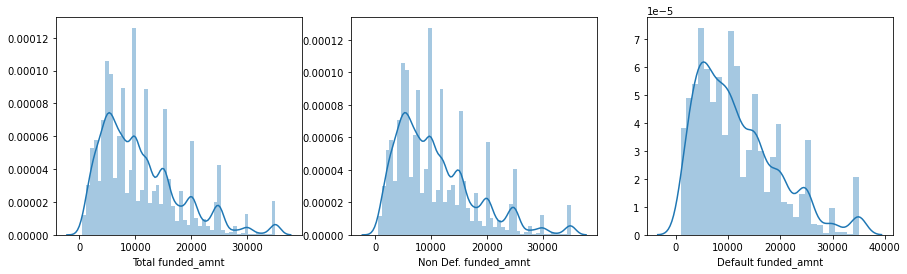

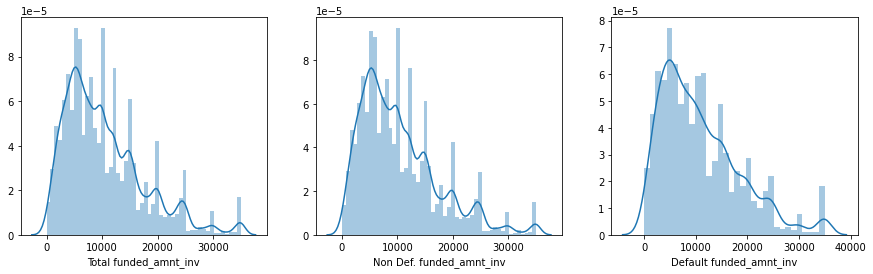

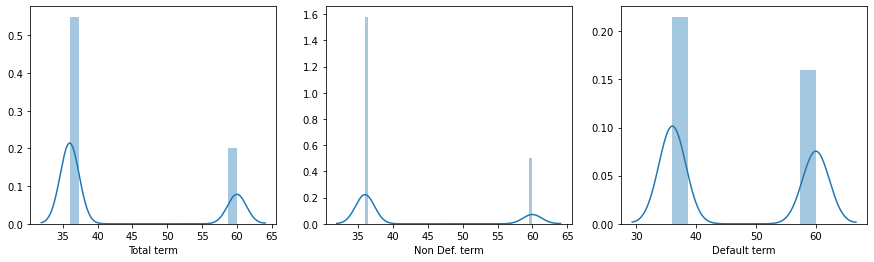

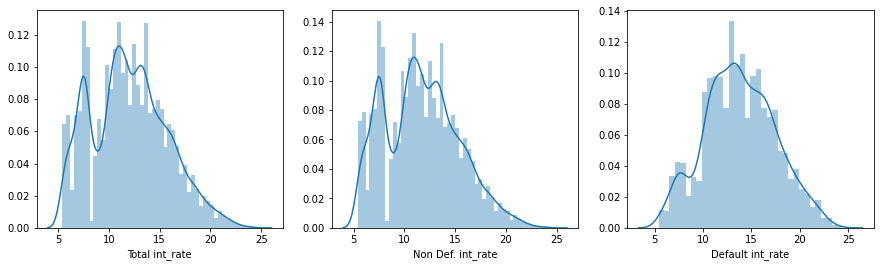

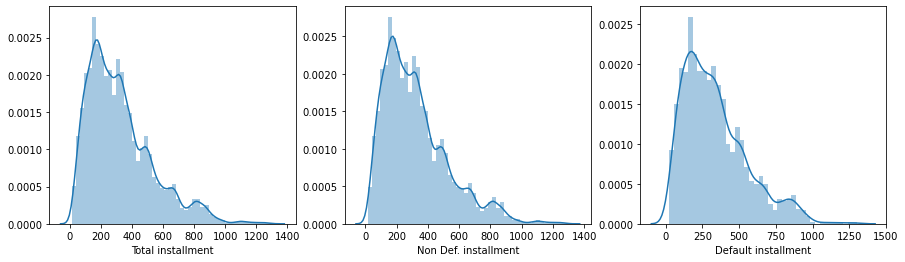

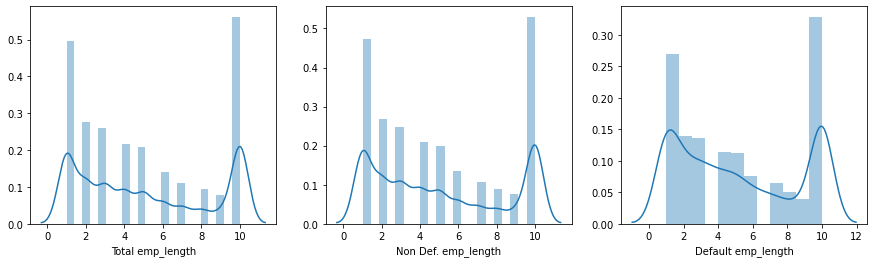

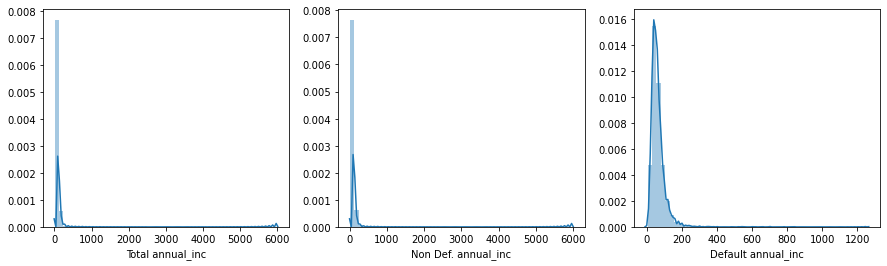

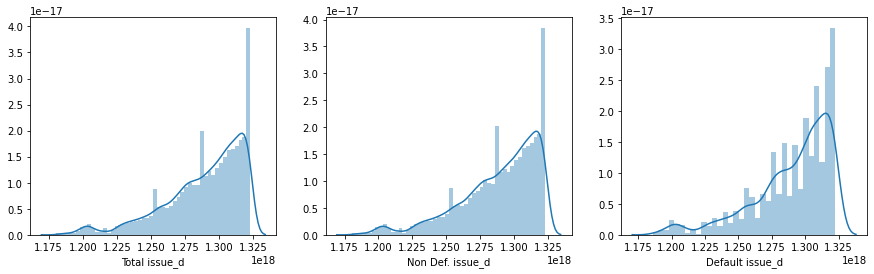

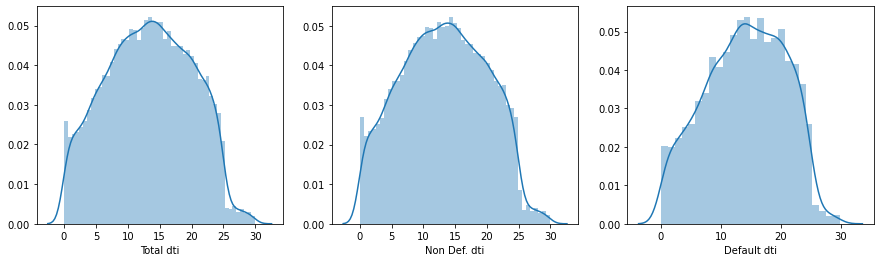

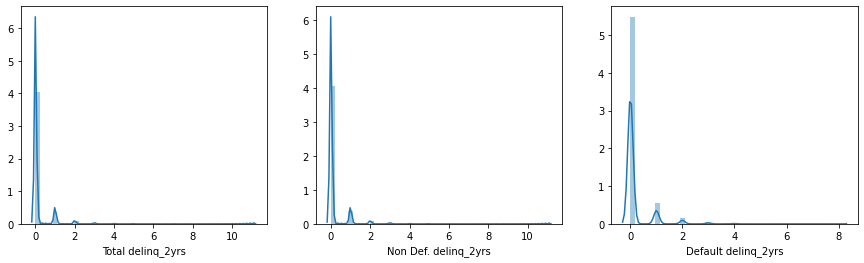

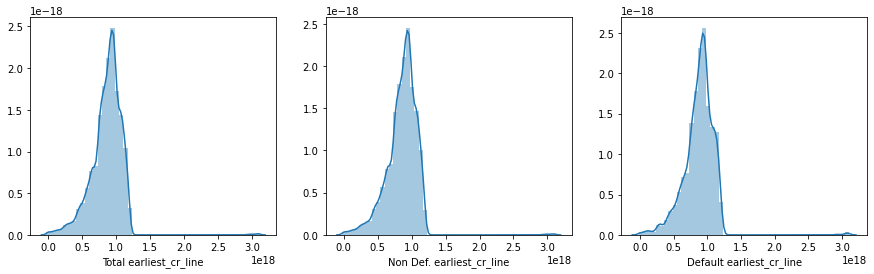

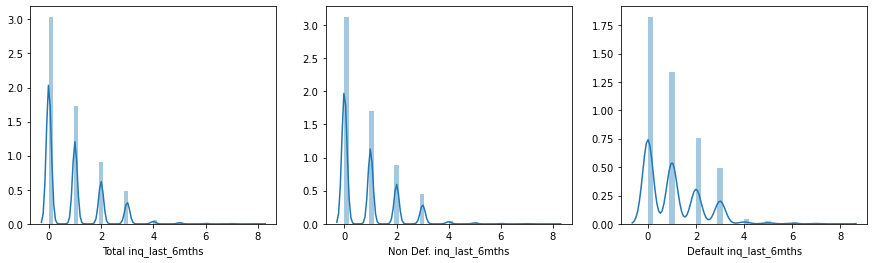

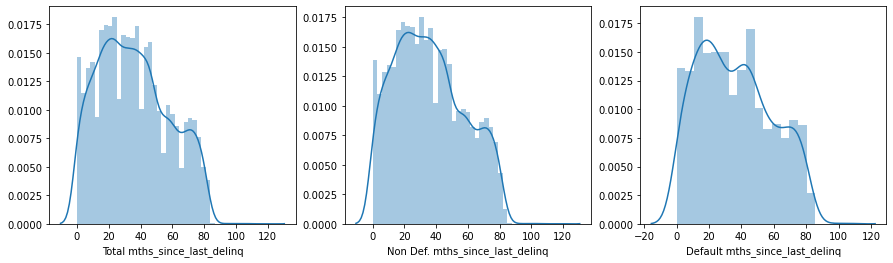

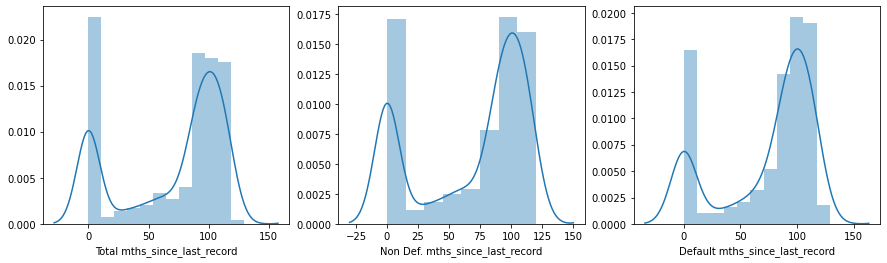

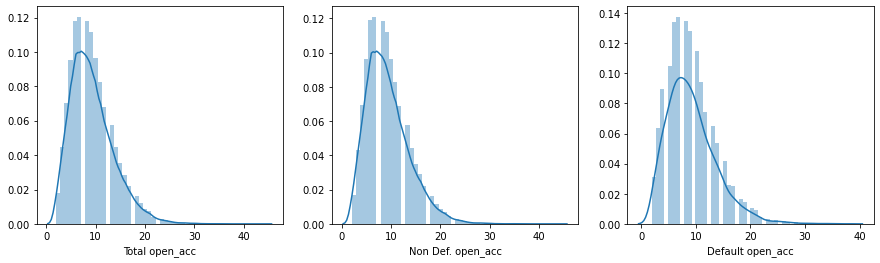

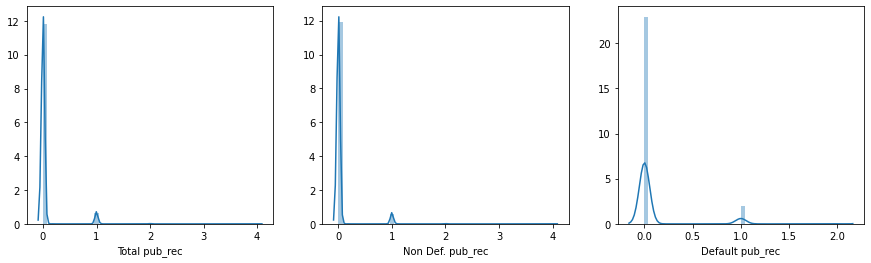

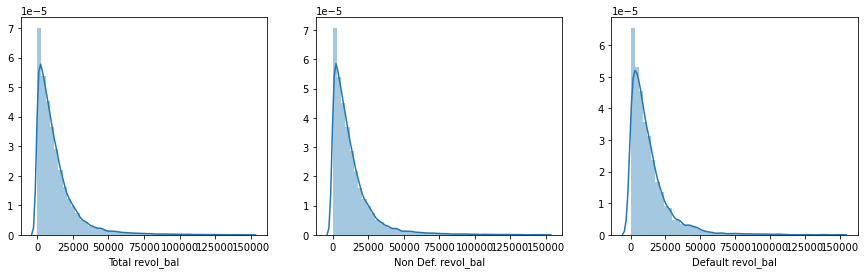

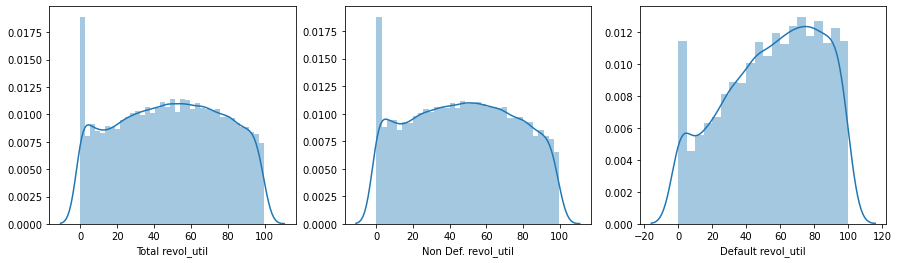

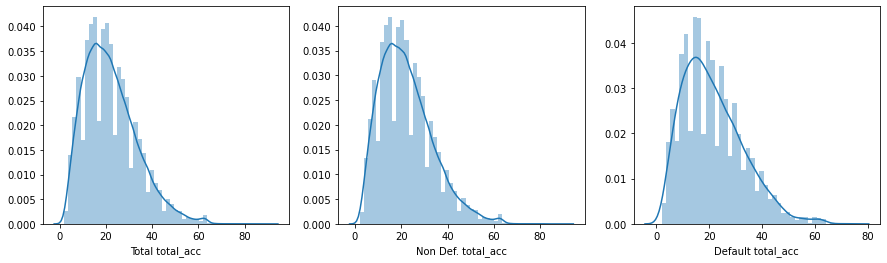

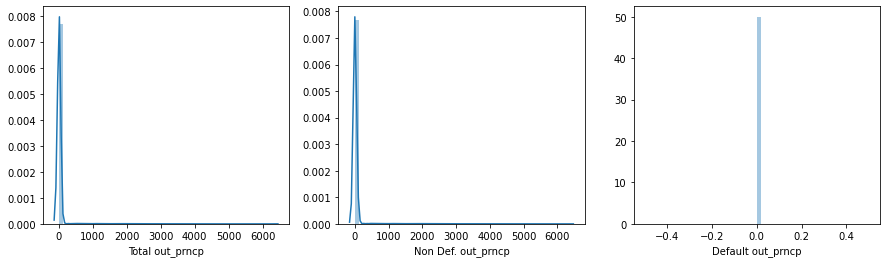

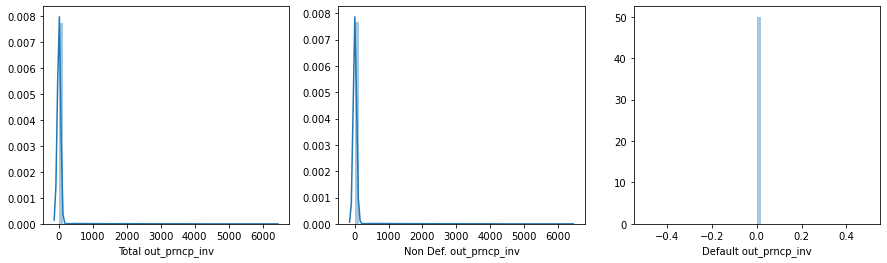

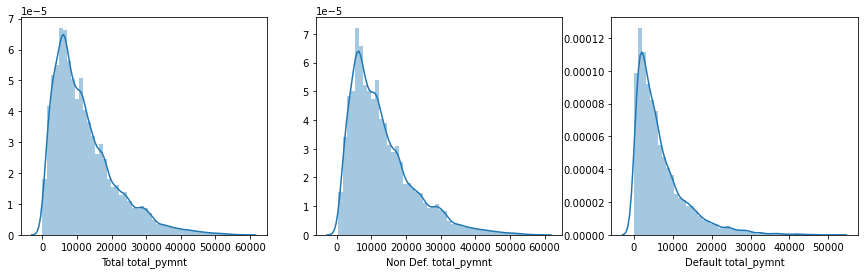

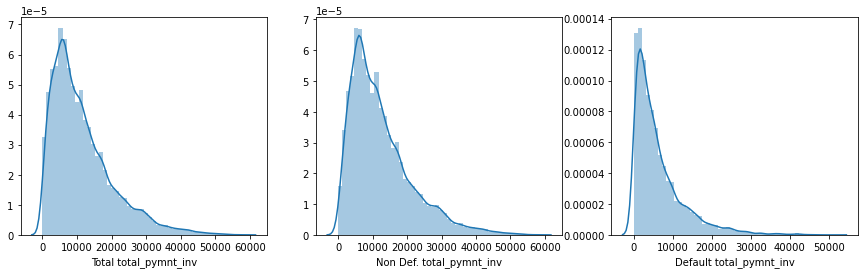

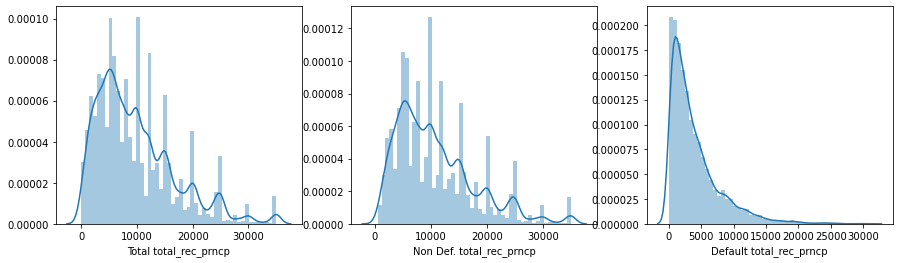

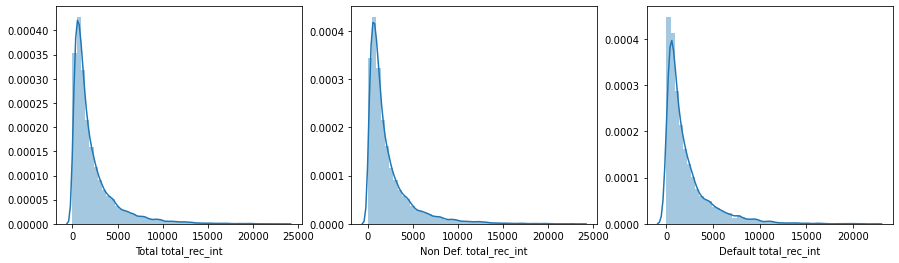

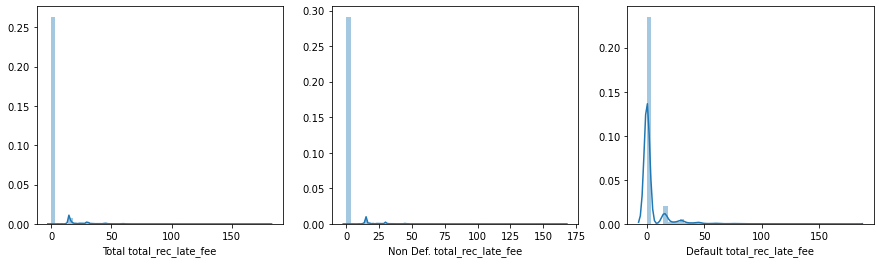

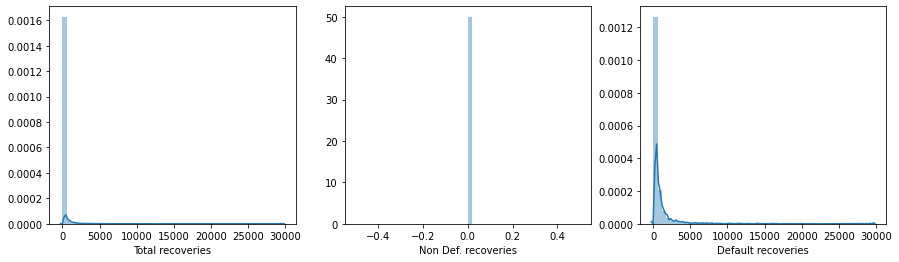

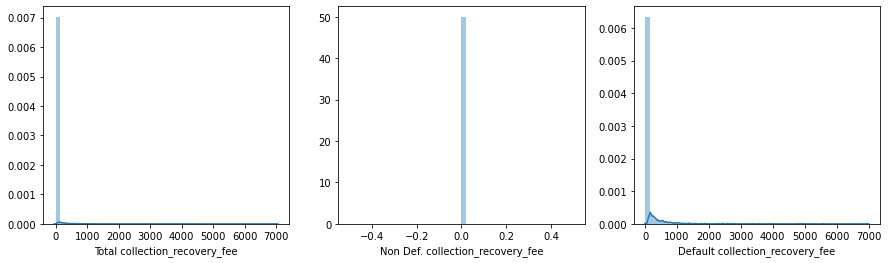

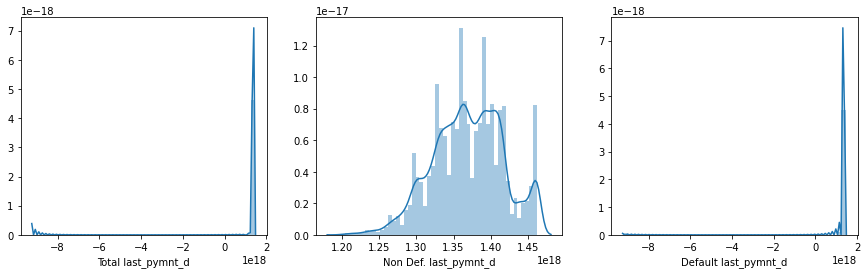

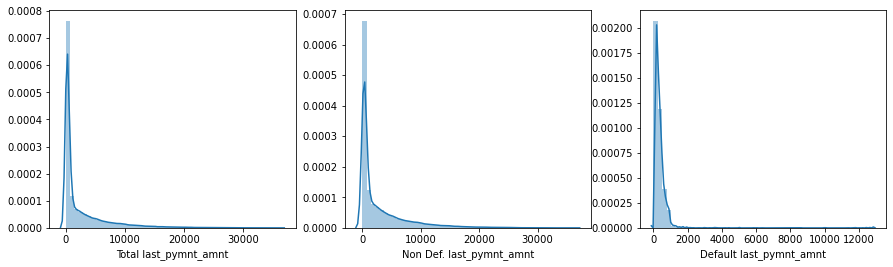

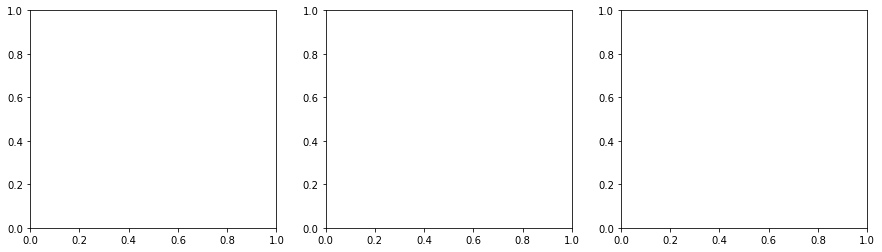

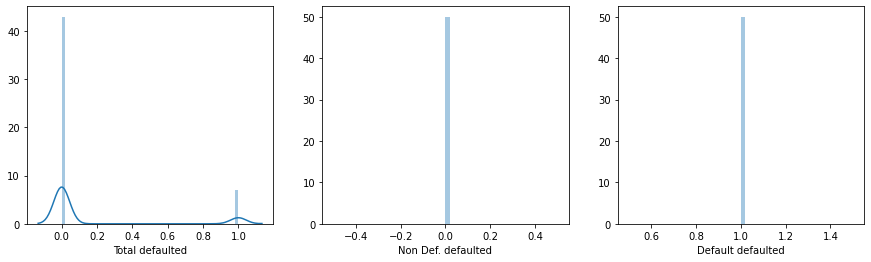

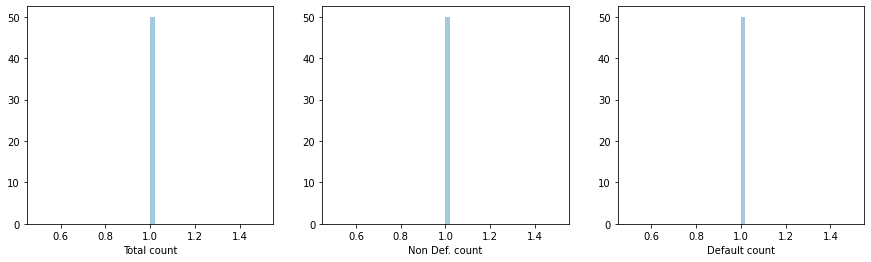

In [72]:
# check all histograms
plt.rcParams.update({'figure.max_open_warning': 0})
numerical_cols = []
for col in df.columns:   
    try:      
        #plt.figure()
        if col in ['id','member_id','emp_title','url','title','sub_grade','loan_status','zip_code']:
            continue
        if col in categorical_cols:
            continue
        all_hist(col)
        numerical_cols.append(col)

    except ValueError:
        #continue
        print('This column can not be represented as a histogram', col)
        #break 

Findings *****
=======
10. **For Default Loans revol_util spread is higher as shown below**

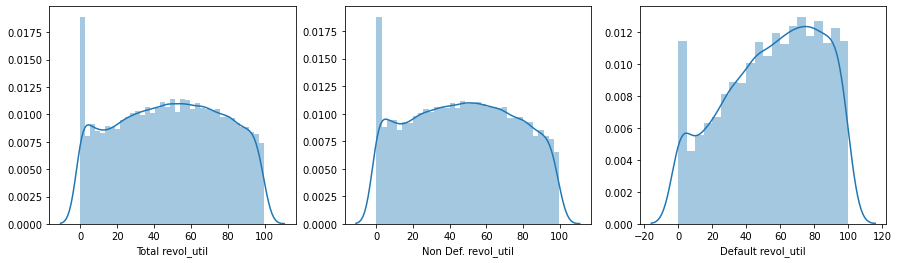

In [73]:
all_hist('revol_util')

11. **For Default Loans int_rate is generally higher**

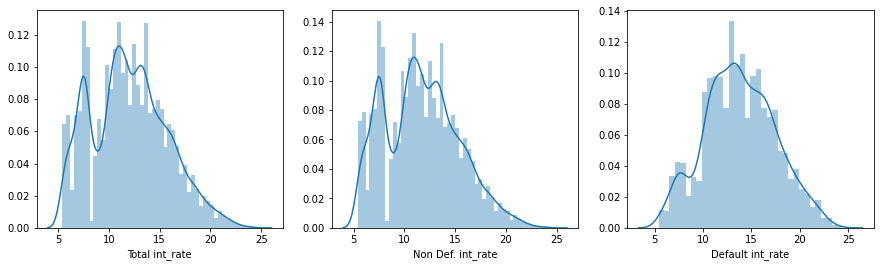

In [74]:
all_hist('int_rate')

12. **For Default Loans loan_amnt & funded_amnt is generally higher**

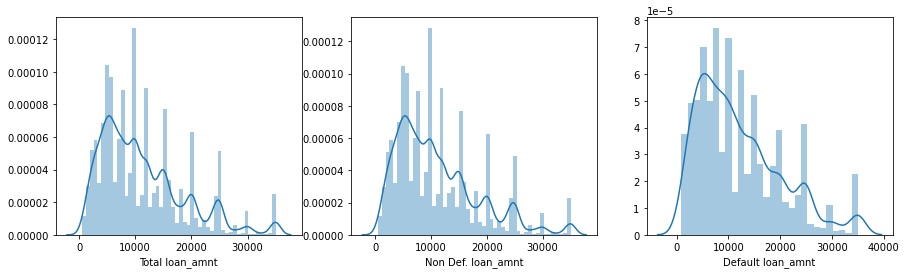

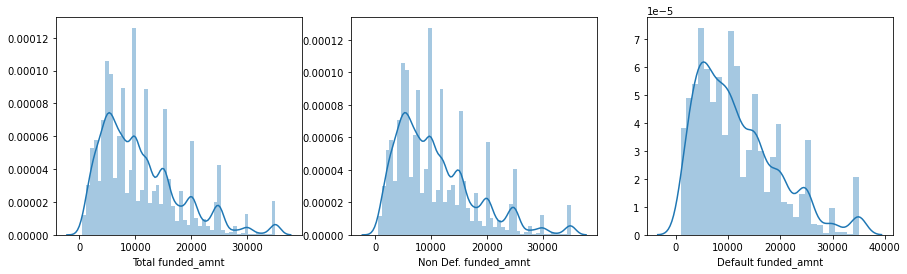

In [75]:
all_hist('loan_amnt')
all_hist('funded_amnt')

13. **For Default Loans Debt to Income Ratio or dti is generally higher**

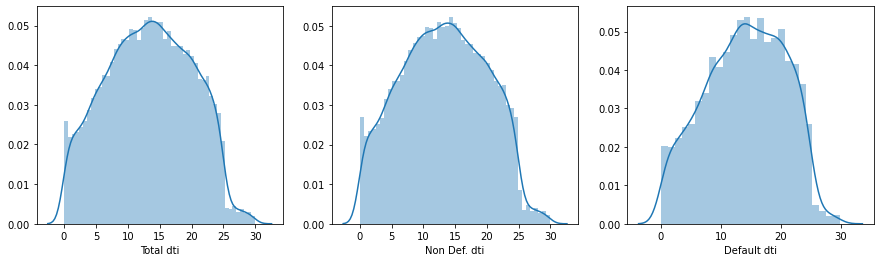

In [76]:
all_hist('dti')

14. **For Default Loans, loan inquiries in last 6 months is higher inq_last_6mths**

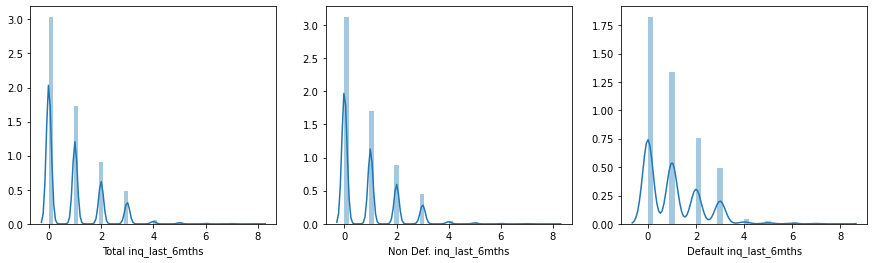

In [77]:
all_hist('inq_last_6mths')

15. **For Default Loans 1 Bankruptcy cases (pub_rec_bankruptcies) are more**

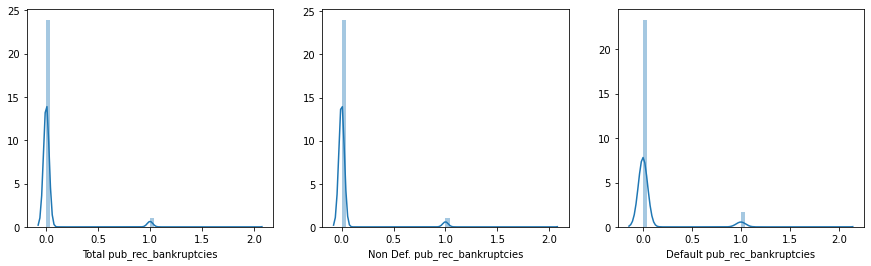

In [78]:
all_hist('pub_rec_bankruptcies')

In [79]:
# group by loan status
df_loan_status = df.groupby('loan_status')

**Segmented analysis by loan_status**

In [80]:
#check means by loan status
df_loan_status.mean()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,defaulted,count,issue_yr
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,697844.014217,8.677521e+05,12104.385108,11753.398792,10864.521299,46.236360,13.820432,336.175006,5.199296,62.427306,14.000624,0.170606,1.058113,36.157330,74.679931,9.178070,0.084770,13514.243647,55.414095,21.427581,0.000000,0.000000,6838.030942,6367.470474,3967.177947,2194.459385,4.291717,672.101872,87.56593,326.020833,0.067163,1.0,1.0,2010.361294
Current,911656.866667,1.127244e+06,17053.991228,16485.701754,16318.265202,60.000000,15.031465,395.476061,6.152095,75.430728,14.750009,0.141228,0.783333,36.595041,95.739130,9.936842,0.042982,16530.893860,53.204482,23.313158,1784.752632,1776.456684,21852.875561,21582.041684,14700.949465,7150.753254,1.172904,0.000000,0.00000,397.468491,0.035965,0.0,1.0,2011.000000
Fully Paid,672712.992261,8.379351e+05,10866.455994,10618.520486,10112.837430,41.157633,11.609761,320.125232,5.037829,69.862525,13.148421,0.142580,0.839909,35.831483,67.812211,9.292049,0.050410,13251.107739,47.482755,22.159393,0.000000,0.000000,12725.781975,12108.624511,10618.514176,2106.398438,0.869452,0.000000,0.00000,3159.554033,0.039449,0.0,1.0,2010.300152


In [81]:
#check medians by loan status
df_loan_status.median()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,defaulted,count,issue_yr
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,696937.0,888158.0,10000.0,10000.0,9401.21,36.0,13.61,293.87,5.0,53.0,14.29,0.0,1.0,34.0,92.0,8.0,0.0,9211.0,58.20,20.0,0.000,0.00,4839.000,4345.74,2729.590,1288.260,0.0,173.04,2.51,238.250,0.0,1.0,1.0,2011.0
Current,884842.5,1099386.5,15825.0,15225.0,15000.00,60.0,14.65,368.19,6.0,65.0,15.05,0.0,0.0,34.0,101.0,9.0,0.0,12627.5,54.95,22.0,1521.025,1500.78,20370.955,20052.04,13652.825,6564.595,0.0,0.00,0.00,369.555,0.0,0.0,1.0,2011.0
Fully Paid,651271.5,832664.5,9600.0,9200.0,8500.00,36.0,11.49,275.65,4.0,60.0,13.20,0.0,1.0,34.0,89.0,9.0,0.0,8682.5,47.50,20.0,0.000,0.00,10687.155,9993.37,9200.000,1301.535,0.0,0.00,0.00,863.685,0.0,0.0,1.0,2011.0


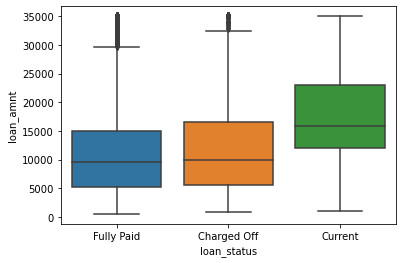

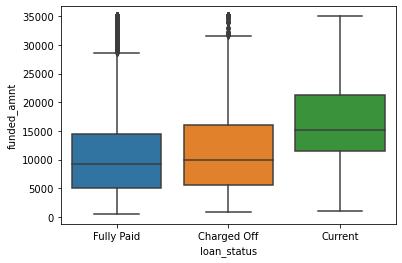

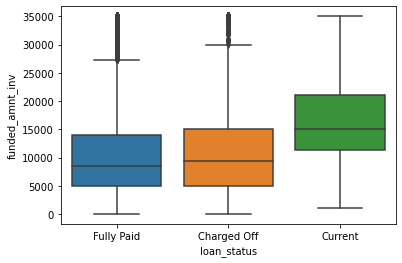

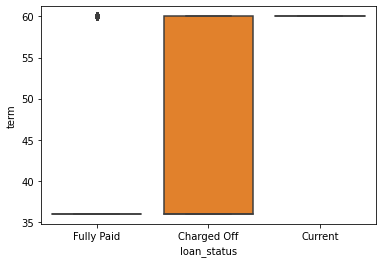

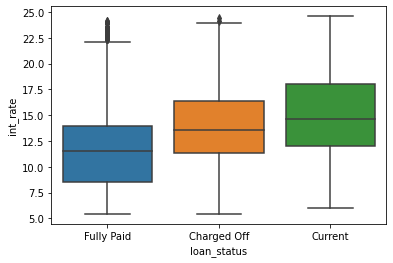

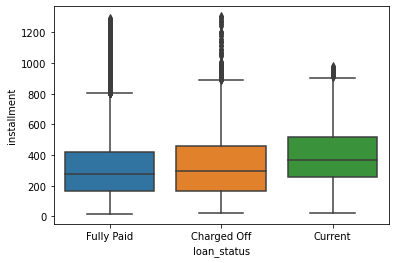

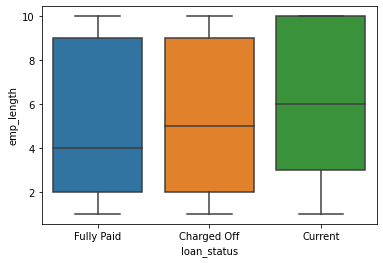

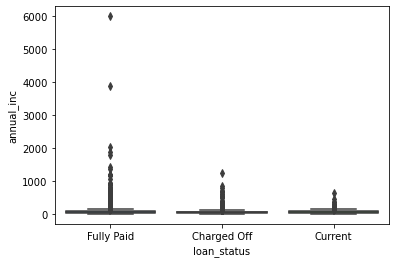

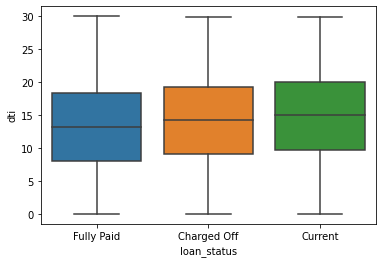

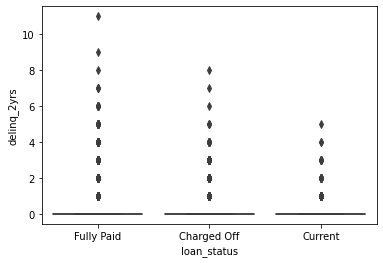

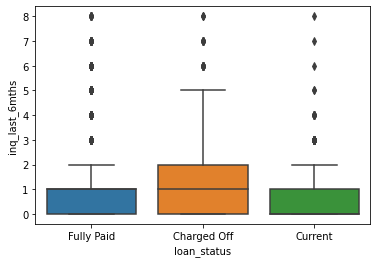

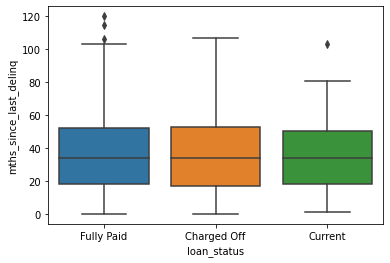

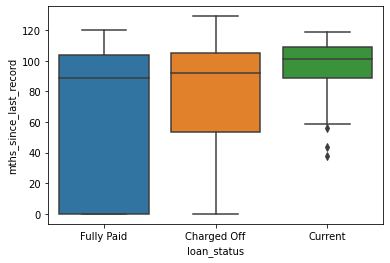

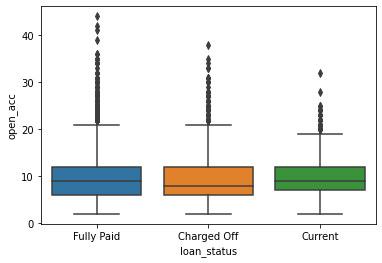

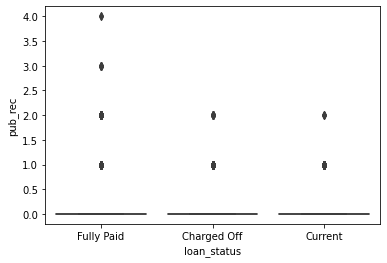

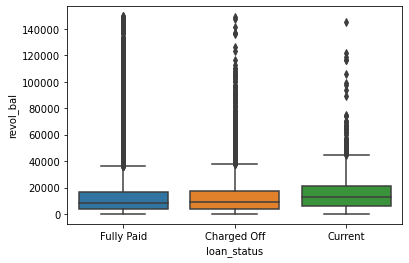

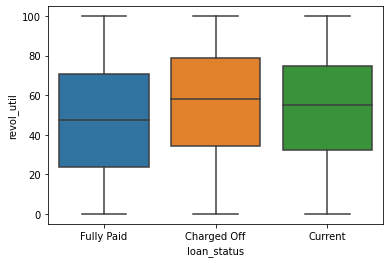

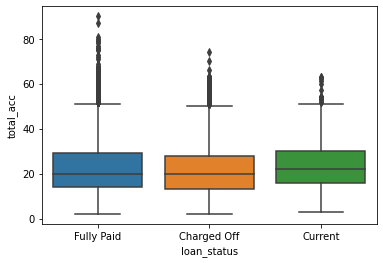

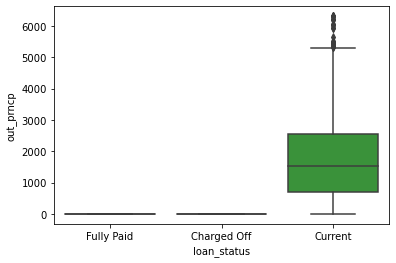

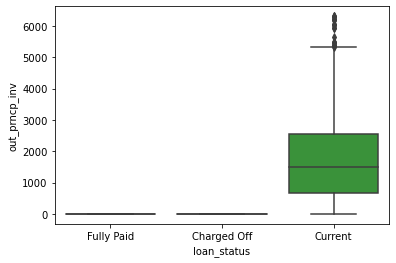

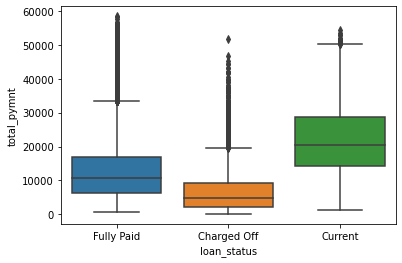

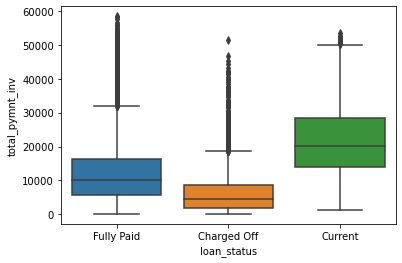

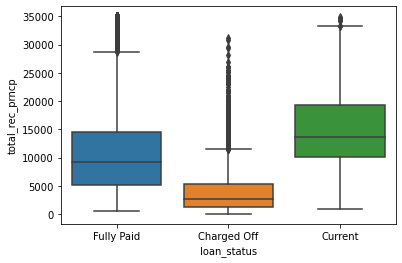

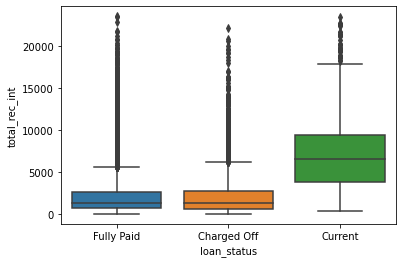

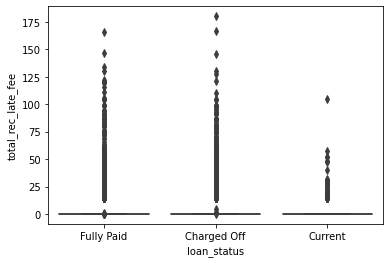

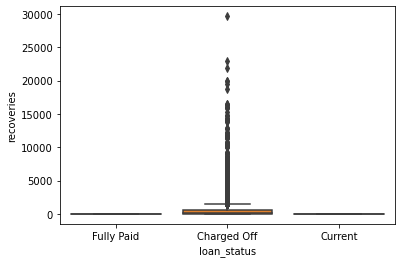

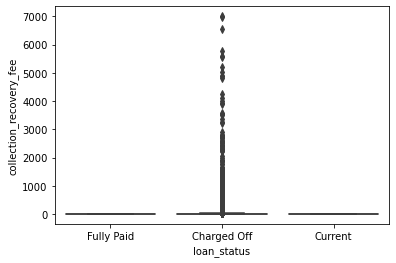

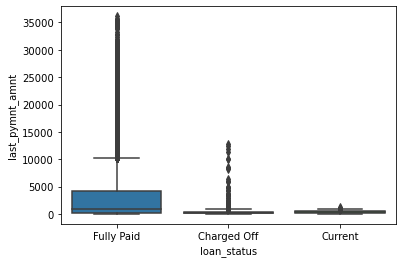

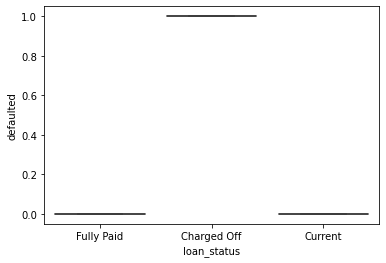

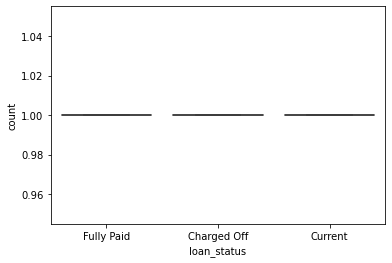

In [82]:
# check all column boxplots by loan_status
for col in numerical_cols:   
    try:  
        if df[col].dtype != 'datetime64[ns]':
            #print(col)
            sns.boxplot(df['loan_status'],df[col])
            plt.show()
    except ValueError:
        print('This column can not be represented as a boxplot', col)

Some Findings Confirmed
========
1) for Charged Off Loan column inq_last_6mths is more
which means :-
    when customers make many enquiries for loans then they default on loans, it means they are not in good financial condition
As shown below

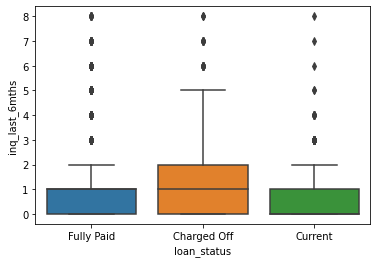

In [83]:
sns.boxplot(df['loan_status'],df['inq_last_6mths'])
plt.show()

2) the above means that revolving utilization of funds increases when default happens

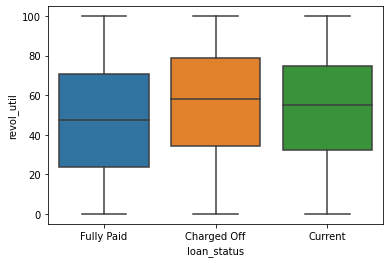

In [84]:
#for Charged off loans revol_util is also slightly more
sns.boxplot(df['loan_status'],df['revol_util'])
plt.show()

<AxesSubplot:>

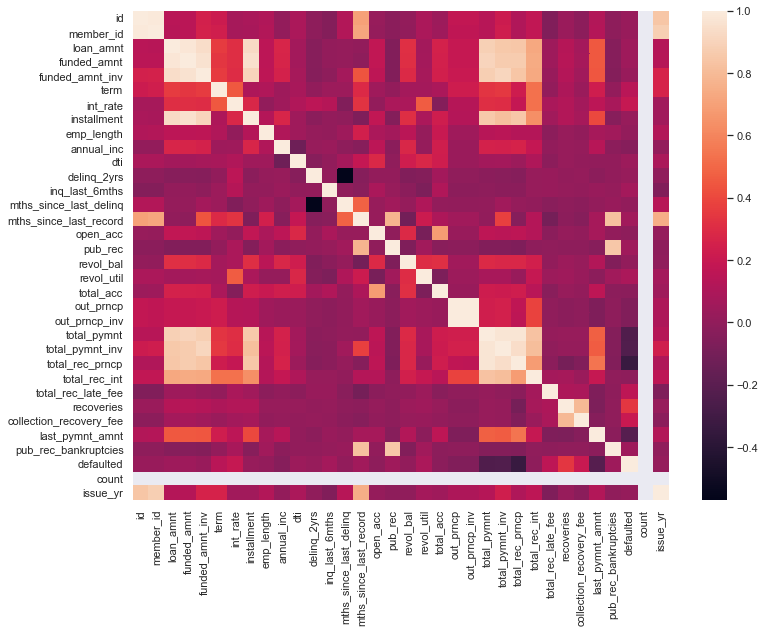

In [91]:
#Correlation heatmap
sns.set(rc={'figure.figsize':(12,9)})
df2 = df.corr()
sns.heatmap(df2)

Findings
=====
16. **defaulted has some -ve correlation with annual_inc, total_rec_prncp, total_pymnt, last_pymnt_amnt**
17. **defaulted has correlation with recoveries, collection_recovery_fee, total_rec_late_fee & int_rate**

In [92]:
# correlation pair plot, commented as it takes long time
#sns.pairplot(data=df)

In [87]:
# last cell - if code is un commented and run then it shows very deep analysis, but takes long time
# check spread of numerical columns over categorical columns segragating default and non-default loans
#cat_cols = ['grade','home_ownership','verification_status','purpose']
#num_cols = ['loan_amnt','int_rate','annual_inc','revol_util','dti','inq_last_6mths','pub_rec_bankruptcies']
#for col in num_cols:
#    for row in cat_cols:
#        print(col+ ' spread')
#        g = sns.FacetGrid(df, row=row, col='defaulted')
#        g.map(sns.distplot, col)
#        plt.show()